<font size="7">Crimes in Boston (2015-2018)</font>

<img id="comp-k87qg1nu2imgimage" style="object-position:50% 50%;width:127px;height:80px;object-fit:contain" alt="Screen_Shot_2020-03-24_at_13-removebg-pr" data-type="image" itemprop="image" src="https://static.wixstatic.com/media/407b54_d4bd43ddf7e84c498d2d60eaba022f3f~mv2.png/v1/fill/w_158,h_100,al_c,q_85,usm_0.66_1.00_0.01/Screen_Shot_2020-03-24_at_13-removebg-pr.webp">


This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. This project is the first project I worked in the field of Data Science under the leadership of UPSchool Data Science Program.

In the scope of this project, we will try to find answers to the following questions:

1. How has crime changed over the years?*

2. Is it possible to predict where or when a crime will be committed?*

3. What can you say about the distribution of different offenses over the city?*

**Data:** [https://www.kaggle.com/ankkur13/boston-crime-data](http://)

<div style="text-align: right"> <img alt="Watching Season 3 GIF - Find &amp; Share on GIPHY" class="n3VNCb" src="https://media1.giphy.com/media/3orieYnHShYp34sd2g/source.gif" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd,gvK6lb;" style="width: 383px; height: 292.038px; margin: 0px;"> </div>

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#reading csv file from db
df = pd.read_csv('../input/boston-crime-data/crime.csv', encoding='latin-1')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


### Understanding Data

In [3]:
print ("The dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n")

The dataframe has 17 columns and 327820 Rows.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

In [5]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [6]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [7]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
dtype: int64

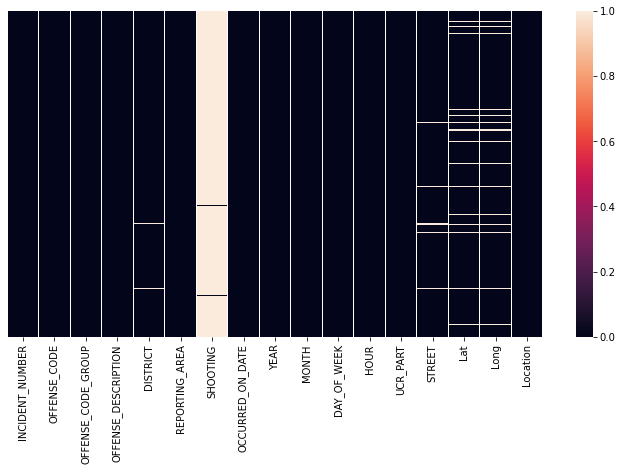

In [8]:
figure = plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels='')

In [9]:
df['UCR_PART'].unique()

array(['Part Two', 'Part Three', 'Part One', nan, 'Other'], dtype=object)

<font size="5">Number of Crimes by Years</font>

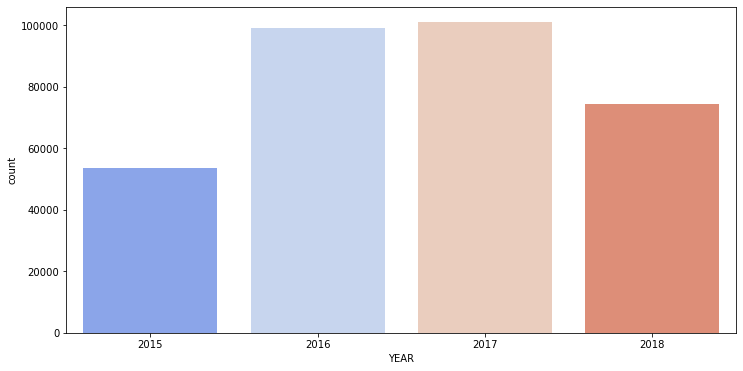

In [10]:
plt.figure(figsize=(12,6))

years=sns.countplot(data=df, x='YEAR', palette="coolwarm")

As you can see at the chart above, although the highest crime rates seem to be in 2016 and in 2017, the fact that the data set is from the 6th month of 2015 and till 10th of 2018 does not make such an inference possible. (See: Number of Crimes by Month, Day and Hour for Each Years) In this context, considering that the dataset contains only 6 months of 2015 and only 9 months of 2018, we can conclude that the number of crimes has not changed significantly according to years.

<font size="5">Number of Crimes by Month, Day and Hour (For All Years)</font>

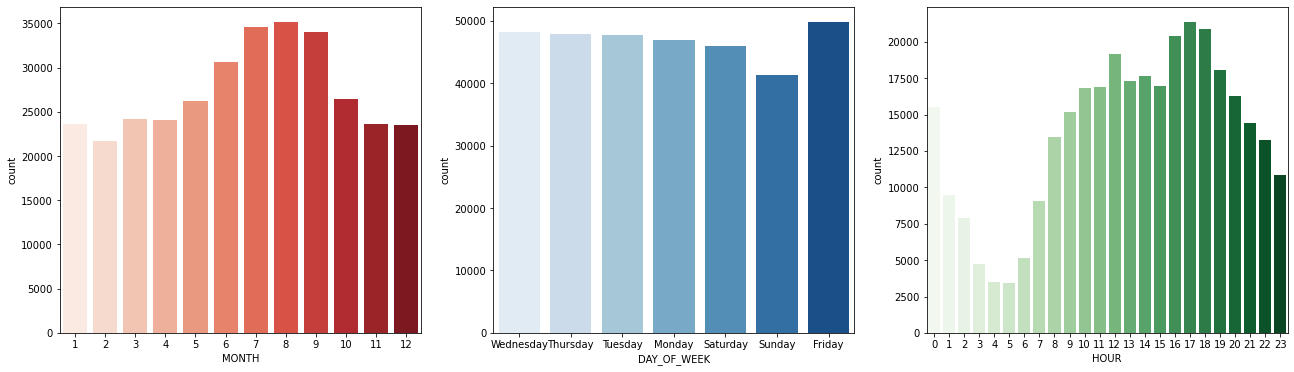

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (22,6))

month=sns.countplot(x='MONTH',
                    data=df,
                    palette="Reds", 
                    order= None,
                    ax = axes[0])

day=sns.countplot(x='DAY_OF_WEEK',
                  data=df, 
                  palette="Blues", 
                  order=None, 
                  ax = axes[1])

hours=sns.countplot(x = 'HOUR',
              data = df,
              palette="Greens",
              order = None,
              ax = axes[2])



When we look at the general picture for all years, we can conclude that crimes are mostly committed in summer. Although the crime density on the days of the week seem almost equal, we can say that they are committed at a higher level on Fridays. On the other hand, contrary to the perception that crimes are usually committed at night, when we examine the above chart, we can say that it is surprisingly more intense between 5 and 7 o'clock in the evening.Considering that the most common crime type is a motor vehicle accident response, I think that the high traffic and motor vehicle density at the specified time intervals may explain the reason for the high crime rate in this hour interval.


As another perspective, as we all know the main source of crime is human. Considering that the vast majority of people sleep at night or are at home, the fact that crime rates are high between the time period of 11:00-19:00 seems quite logical. (except for larcency)

<font size="5">Number of Crimes by Month, Day and Hour (for Each Years)</font>

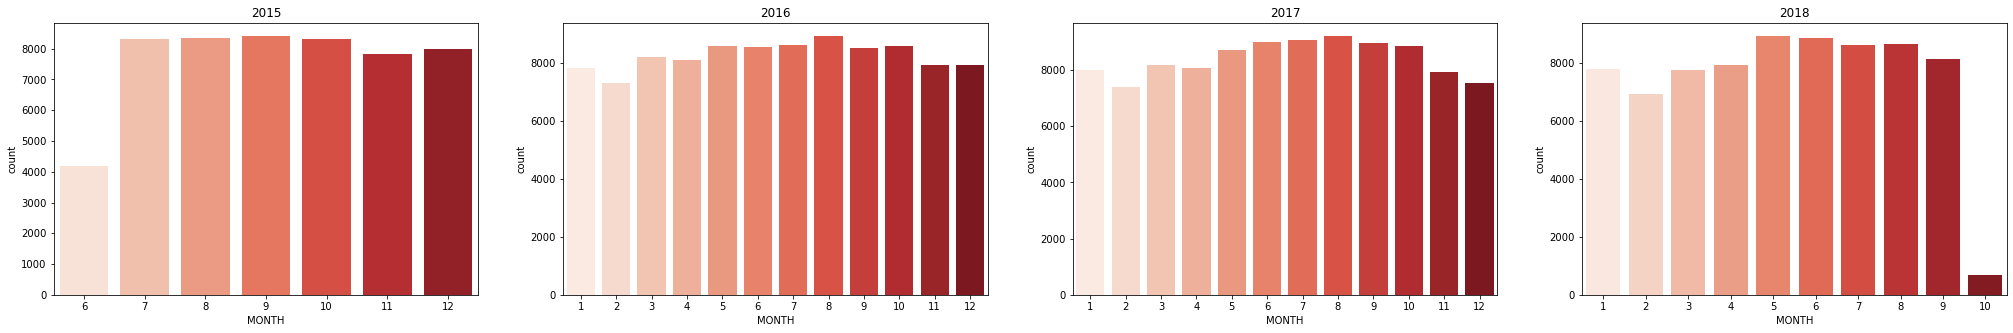

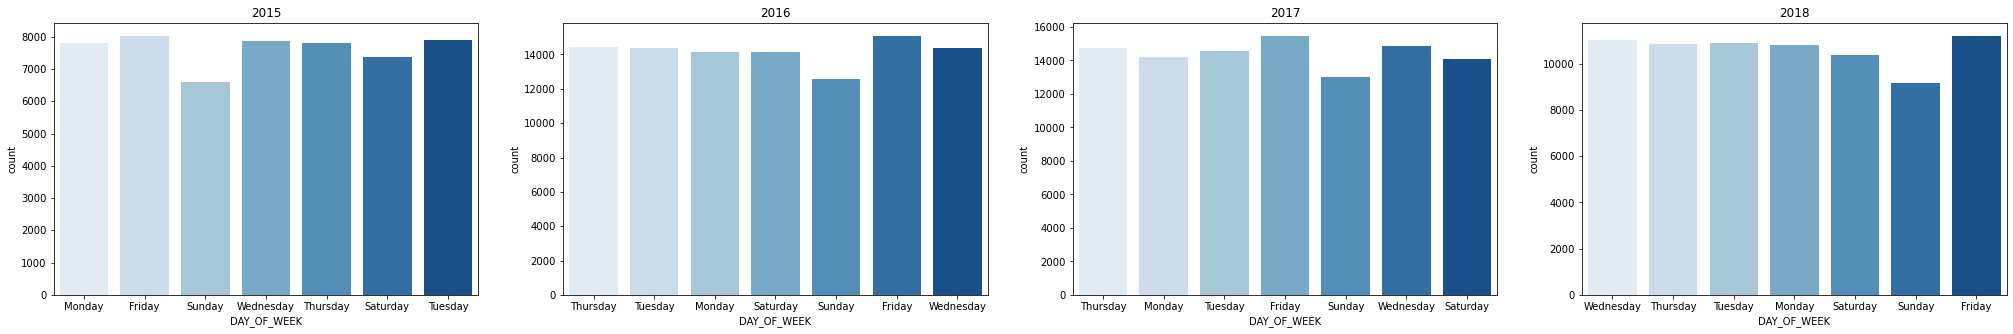

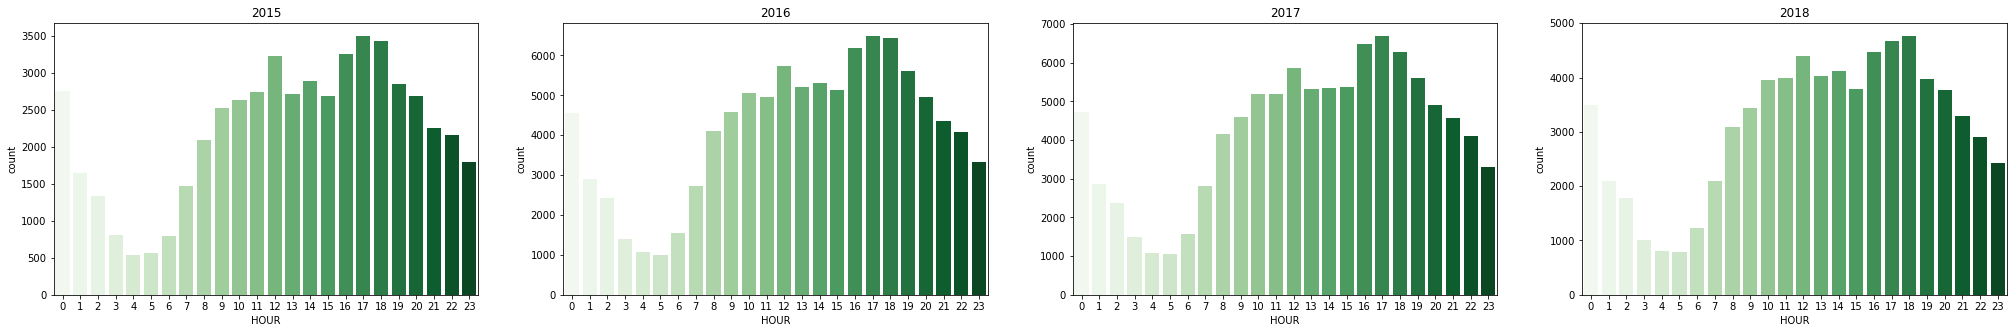

In [12]:
df_2015=df[df['YEAR']==2015]
df_2016=df[df['YEAR']==2016]
df_2017=df[df['YEAR']==2017]
df_2018=df[df['YEAR']==2018]

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (35,5))

month_2015=sns.countplot(x='MONTH',
                    data=df_2015,
                    palette="Reds", 
                    order= None,
                    ax = axes[0]).set_title('2015')


month_2016=sns.countplot(x='MONTH',
                    data=df_2016,
                    palette="Reds", 
                    order= None,
                    ax = axes[1]).set_title('2016')


month_2017=sns.countplot(x='MONTH',
                    data=df_2017,
                    palette="Reds", 
                    order= None,
                    ax = axes[2]).set_title('2017')


month_2018=sns.countplot(x='MONTH',
                    data=df_2018,
                    palette="Reds", 
                    order= None,
                    ax = axes[3]).set_title('2018')

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (35,5))

day_2015=sns.countplot(x='DAY_OF_WEEK',
                    data=df_2015,
                    palette="Blues", 
                    order= None,
                    ax = axes[0]).set_title('2015')


day_2016=sns.countplot(x='DAY_OF_WEEK',
                    data=df_2016,
                    palette="Blues", 
                    order= None,
                    ax = axes[1]).set_title('2016')


day_2017=sns.countplot(x='DAY_OF_WEEK',
                    data=df_2017,
                    palette="Blues", 
                    order= None,
                    ax = axes[2]).set_title('2017')


day_2018=sns.countplot(x='DAY_OF_WEEK',
                    data=df_2018,
                    palette="Blues", 
                    order= None,
                    ax = axes[3]).set_title('2018')

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (35,5))

hour_2015=sns.countplot(x='HOUR',
                    data=df_2015,
                    palette="Greens", 
                    order= None,
                    ax = axes[0]).set_title('2015')


hour_2016=sns.countplot(x='HOUR',
                    data=df_2016,
                    palette="Greens", 
                    order= None,
                    ax = axes[1]).set_title('2016')


hour_2017=sns.countplot(x='HOUR',
                    data=df_2017,
                    palette="Greens", 
                    order= None,
                    ax = axes[2]).set_title('2017')


hour_2018=sns.countplot(x='HOUR',
                    data=df_2018,
                    palette="Greens", 
                    order= None,
                    ax = axes[3]).set_title('2018')

figure.tight_layout(pad=3.0)


Interestingly, when we analyze the charts above, we can see that there is no apparent variability in the distribution of the months, days and hours of the crime and has almost the same distribution for all years. This means that there is no change in the crime behavior of people living in Boston for 4 years. It is possible to evaluate this situation as a positive result so that crimes can be estimated and resolved correctly.

General observations:

-The most common months are in summer,

-The most common day is "Friday",

-The most common hours are between 17:00-19:00.

<a role="link" tabindex="0" rel="noopener" target="_blank" href="https://www.google.com/url?sa=i&amp;url=https%3A%2F%2Fwww.pinterest.at%2Fpin%2F189221621826926397%2F&amp;psig=AOvVaw2TyuGTtGuM1oBpskqpup6N&amp;ust=1595706674499000&amp;source=images&amp;cd=vfe&amp;ved=0CAIQjRxqFwoTCOiwnuHU5uoCFQAAAAAdAAAAABAJ" jsaction="focus:kvVbVb; mousedown:kvVbVb; touchstart:kvVbVb;" aria-label="Pinterest sitesine git" class="eHAdSb" data-ved="0CAIQjRxqFwoTCOiwnuHU5uoCFQAAAAAdAAAAABAJ" rlhc="1"><img alt="Friday The 13Th GIF" class="n3VNCb" src="https://i.pinimg.com/originals/f2/5a/3a/f25a3aa9b1736ea860c9eacfa4ae67ee.gif" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd,gvK6lb;" style="width: 383px; height: 383px; margin: 0px;"><span class="VSIspc" jsname="eQ3Oyb" style="margin: 0px;">400 × 400</span></a>


<font size="5">Top Crimes in Boston</font>

In [13]:
nr_crimes = df['OFFENSE_CODE_GROUP'].value_counts()
counts = nr_crimes.values
categories = pd.DataFrame(data=nr_crimes.index, columns=["OFFENSE_CODE_GROUP"])
categories['counts'] = counts
categories.head()

,OFFENSE_CODE_GROUP,counts
0,Motor Vehicle Accident Response,38134
1,Larceny,26670
2,Medical Assistance,24226
3,Investigate Person,19176
4,Other,18612


In [14]:
import plotly.express as px

fig = px.treemap(categories, path=['OFFENSE_CODE_GROUP'], values=counts, height=700,
                 title='Top Crimes in Boston', color_discrete_sequence = px.colors.sequential.Brwnyl)
fig.data[0].textinfo = 'label+value'
fig.show()

Looking at the table above, the 5 most committed crimes in Boston are respectively below;

1.Motor Vehicle Accident Response, 
2.Larceny, Medical Assistance, 
3.Investigate Person,
4.Other,
5.Drug Violation.

In [16]:
import folium
from folium.plugins import HeatMap

df_drop=df.dropna(subset=['Lat', 'Long', 'DISTRICT'])

df_heatmap_mvar=df_drop[['Lat', 'Long', 'DISTRICT']]


map_mvar = folium.Map(location=[42.361145,-71.057083], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=df_heatmap_mvar[['Lat', 'Long']], radius=10).add_to(map_mvar)

# Display the map
map_mvar

KeyError: "None of [Index(['Lat', 'Long'], dtype='object')] are in the [index]"

<font size="5">Motor Vehicle Accident Response HeatMap</font>

In [ ]:
import folium
from folium.plugins import HeatMap

df_drop=df.dropna(subset=['Lat', 'Long', 'DISTRICT'])

df_heatmap_mvar=df_drop[df_drop["OFFENSE_CODE_GROUP"]=='Motor Vehicle Accident Response']


map_mvar = folium.Map(location=[42.361145,-71.057083], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=df_heatmap_mvar[['Lat', 'Long']], radius=10).add_to(map_mvar)

# Display the map
map_mvar

According to the heat map above, we can say that the Motor Vehicle Accident Response crime is almost common in every region of Boston in general. But if we compare to other regions, we can say that it is less in southwest of Boston. In this context, it can be concluded that the use of motor vehicles in the related regions is more common or that people living in these regions tend to respond even in fatal motor vehicle accidents  compared to those living in the south.

<font size="5">Larcency Heatmap</font>

In [ ]:
df_heatmap_larcency=df_drop[df_drop["OFFENSE_CODE_GROUP"]=='Larceny']


map_larcency = folium.Map(location=[42.361145,-71.057083], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=df_heatmap_larcency[['Lat', 'Long']], radius=10).add_to(map_larcency)

# Display the map
map_larcency

We can say that the larcency crime is mostly committed in the center of Boston, and as moving away from the center, especially in the southern districts, the larcency rate is lower compared to the central districts. There may be many reasons for this, such as population density, economic reasons or the mental state of the people live in that districts.

<font size="5">Medical Assistance HeatMap</font>

In [ ]:
df_heatmap_ma=df_drop[df_drop["OFFENSE_CODE_GROUP"]=='Medical Assistance']


map_ma = folium.Map(location=[42.361145,-71.057083], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=df_heatmap_ma[['Lat', 'Long']], radius=10).add_to(map_ma)

# Display the map
map_ma

-According to the heatmape above, we can conclude that the medical assistance crime rate is higher in the northern districts than Southern districts of Boston.

In many countries, after the regulations made in the field of law, it is possible to help for the dying adults under certain conditions. For example, in the scope of the arrangements made in law in Canada in 2020, it is made possible to help victims who were dying for people with the following conditions:

-physicians

-nurse practitioners (in provinces where this is allowed)

-pharmacists

-family members or other people that you ask to help

-health care providers who help physicians or nurse practitioners

However, medical assistance for dying people in many countries is still considered as an important crime. Therefore, if we look at the most common crimes table above, we can see that medical assistance is the third most committed crime in Boston. In the scope of this, we can say that such a regulation has not yet been made in the state of Massachusetts and people are not afraid of medical assistance and tend to be assistant for dying people, although it is still seen as an important crime. (especially for people living in northern districts)

<font size="5">Drug Violation HeatMap</font>

In [ ]:
df_heatmap_drugvio=df_drop[df_drop["OFFENSE_CODE_GROUP"]=='Drug Violation']


map_drugvio = folium.Map(location=[42.361145,-71.057083], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=df_heatmap_drugvio[['Lat', 'Long']], radius=10).add_to(map_drugvio)

# Display the map
map_drugvio
 


According to the heatmap above, we can say that the crime of drug violation is more committed in the central regions than the outer regions of Boston, and is concentrated especially in China Town and South End districts.

If we evaluate in generally, we can conclude that the drug violation is the fourth most committed crime in boston, and density of drug use is high in Boston. Likewise, it can be concluded that the rate of drug use is high in the central regions where this crime is high.

<font size="5">Shooting Analysis</font>

Shooting column consists of Nan values in general. These Nan values mean that "if shooting didn’t take place the row was left empty and if it took place it was coded as “Y”." within the scope of the source below. In this context, the analysis results regarding the shooting values in the data set are as follows:

**Source:**[https://rstudio-pubs-static.s3.amazonaws.com/453629_6be32e64d25b4e7189bc3bbe6968bcaf.html#introduction](http://)

In [ ]:
df['SHOOTING'].describe()

In [ ]:
shooting_y=df[df['SHOOTING']=='Y']

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (10,20))

sns.countplot(data=shooting_y, x='YEAR', palette='Purples', ax=axes[0])
sns.countplot(data=shooting_y, x='MONTH', palette='Reds', ax=axes[1])
sns.countplot(data=shooting_y, x='DAY_OF_WEEK', palette='Blues', ax=axes[2])
sns.countplot(data=shooting_y, x='HOUR', palette='Greens', ax=axes[3])

Within the scope of the charts above, we can say that the year in which shooting is the highest is 2017, the most common day is "Saturday" and the most common hours are midnights. Also, interestingly, the shooting rate seems to be high around at 16:00 during the day besides at midnights.

On the other hand, when we look at the number of shooting, we can say that it does not have a high rate in general with 1055 record within 327820 records. However, considering the three most frequent crimes in Boston, the low rate of shooting can be considered as a reasonable result. (1.Motor Vehicle Accident Response, 2. Larceny, 3. Medical Assistance)

<font size="5">Crime Categories of Shooting</font>

In [ ]:
shooting_y=df[df['SHOOTING']=='Y']
df['SHOOTING'].value_counts().sum()

nr_shooting = shooting_y['OFFENSE_CODE_GROUP'].value_counts()
counts_shooting = nr_shooting.values
categories_2 = pd.DataFrame(data=nr_shooting.index, columns=["OFFENSE_CODE_GROUP"])
categories_2['counts_shooting'] = counts_shooting
categories_2

When we examine the above table, it can be evaluated positively that the most frequently committed crimes in Boston do not contain shooting and that crimes involving shooting have a small share among all crimes.

In [ ]:
plt.figure(figsize=(13,6))

sns.barplot(data=categories_2.head(10), x='counts_shooting', y='OFFENSE_CODE_GROUP', palette='Blues_d')

<font size="5">Shooting Heatmap</font>

In [ ]:
df_heatmap_shooting=df_drop[df_drop["SHOOTING"]=='Y']


map_shooting = folium.Map(location=[42.361145,-71.057083], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=df_heatmap_shooting[['Lat', 'Long']], radius=10).add_to(map_shooting)

# Display the map
map_shooting

If we look at the heat map above, we can see that the shooting rate in the center of Boston is much lower than in the southern dictricts. In this context, it is possible to reach the conclusion that armament and armed crimes are more intense in the southern regions. 

On the other hand, we can think that the security forces in these regions are not sufficient, they have a more passive attitude towards armed events or they have less education and experience for such situations.

<font size="5">Distribution of Shooting Counts by District Names and Codes</font>

In [ ]:
data = {'DISTRICT': ['A1', 'A15', 'A7', 'B2', 'B3','C6','C11','D4','D14','E5','E13','E18'], 
        'DISTRICT_NAME': ['Downtown','Charlestown','East Boston','Roxbury','Mattapan',
                          'South Boston','Dorchester','South End','Brighton','West Roxbury',
                          'Jamaica Plain','Hyde Park']}

district_df=pd.DataFrame.from_dict(data)

inner_join = pd.merge(shooting_y,  
                      district_df,  
                      on ='DISTRICT',  
                      how ='inner')
inner_join

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

sns.countplot(data=inner_join, y='DISTRICT_NAME', order=inner_join['DISTRICT_NAME'].value_counts().index, palette='Blues_d', ax=axes[0])
sns.countplot(data=inner_join, y='DISTRICT', order=inner_join['DISTRICT'].value_counts().index, palette='Reds_d', ax=axes[1])

### UCR_PART

### Part 1 

In [ ]:
df = df.dropna(subset=['UCR_PART'])
df.info()

In [ ]:
pie_chart = df.groupby('UCR_PART').count()['INCIDENT_NUMBER'].to_frame()
pie_chart

In [ ]:
fig_pie = px.pie(data_frame=pie_chart, values=pie_chart['INCIDENT_NUMBER'], names=pie_chart.index)
fig_pie.show()

In [ ]:
df_part_one = df[df['UCR_PART']=='Part One']
df_part_one

In [ ]:
#Where do Part 1 crimes occur?

inner_join_part_one = pd.merge(df_part_one,  
                      district_df,  
                      on ='DISTRICT',  
                      how ='inner')

group_street = inner_join_part_one.groupby('STREET')['INCIDENT_NUMBER'].count().sort_values(ascending=False).to_frame().reset_index().head(12)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

sns.countplot(data=inner_join_part_one, y='DISTRICT_NAME', order=inner_join_part_one['DISTRICT_NAME'].value_counts().index, palette='Blues_d', ax=axes[0])
sns.barplot(x=group_street['INCIDENT_NUMBER'], y=group_street['STREET'], palette="Reds_d", ax=axes[1])

In [ ]:
group_street


In [ ]:
#What are the offense types according to UCR_Part?

list_part_one = []
list_part_two = []
list_part_three = []


for x in df_part_one['OFFENSE_CODE_GROUP'].unique():
    list_part_one.append(x)
for y in df[df['UCR_PART']=='Part Two']['OFFENSE_CODE_GROUP'].unique():
    list_part_two.append(y)
for z in df[df['UCR_PART']=='Part Three']['OFFENSE_CODE_GROUP'].unique():
    list_part_three.append(z)
print('Part One: {}'.format(list_part_one))
print('Part Two: {}'.format(list_part_two))
print('Part Three: {}'.format(list_part_three))

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (22,6))

month=sns.countplot(x='MONTH',
                    data=df_part_one,
                    palette="Reds", 
                    order= None,
                    ax = axes[0])

day=sns.countplot(x='DAY_OF_WEEK',
                  data=df_part_one, 
                  palette="Blues", 
                  order=None, 
                  ax = axes[1])

hours=sns.countplot(x = 'HOUR',
              data = df_part_one,
              palette="Greens",
              order = None,
              ax = axes[2])



In [ ]:
df_part_one.groupby('REPORTING_AREA')['INCIDENT_NUMBER'].count().sort_values(ascending=False).to_frame()

### Part 2

In [ ]:
df_part_two = df[df['UCR_PART']=='Part Two']
df_part_two

In [ ]:
inner_join_part_two = pd.merge(df_part_two,  
                      district_df,  
                      on ='DISTRICT',  
                      how ='inner')

group_street = inner_join_part_two.groupby('STREET')['INCIDENT_NUMBER'].count().sort_values(ascending=False).to_frame().reset_index().head(12)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

sns.countplot(data=inner_join_part_two, y='DISTRICT_NAME', order=inner_join_part_two['DISTRICT_NAME'].value_counts().index, palette='Blues_d', ax=axes[0])
sns.barplot(x=group_street['INCIDENT_NUMBER'], y=group_street['STREET'], palette="Reds_d", ax=axes[1])

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (22,6))

month=sns.countplot(x='MONTH',
                    data=df_part_two,
                    palette="Reds", 
                    order= None,
                    ax = axes[0])

day=sns.countplot(x='DAY_OF_WEEK',
                  data=df_part_two, 
                  palette="Blues", 
                  order=None, 
                  ax = axes[1])

hours=sns.countplot(x = 'HOUR',
              data = df_part_two,
              palette="Greens",
              order = None,
              ax = axes[2])


In [ ]:
df_part_two.groupby('REPORTING_AREA')['INCIDENT_NUMBER'].count().sort_values(ascending=False).to_frame()

### Part 3

In [ ]:
df_part_three= df[df['UCR_PART']=='Part Three']
df_part_three

In [ ]:
inner_join_part_three = pd.merge(df_part_three,  
                      district_df,  
                      on ='DISTRICT',  
                      how ='inner')

group_street = inner_join_part_three.groupby('STREET')['INCIDENT_NUMBER'].count().sort_values(ascending=False).to_frame().reset_index().head(12)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

sns.countplot(data=inner_join_part_three, y='DISTRICT_NAME', order=inner_join_part_three['DISTRICT_NAME'].value_counts().index, palette='Blues_d', ax=axes[0])
sns.barplot(x=group_street['INCIDENT_NUMBER'], y=group_street['STREET'], palette="Reds_d", ax=axes[1])

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (22,6))

month=sns.countplot(x='MONTH',
                    data=df_part_three,
                    palette="Reds", 
                    order= None,
                    ax = axes[0])

day=sns.countplot(x='DAY_OF_WEEK',
                  data=df_part_three, 
                  palette="Blues", 
                  order=None, 
                  ax = axes[1])

hours=sns.countplot(x = 'HOUR',
              data = df_part_three,
              palette="Greens",
              order = None,
              ax = axes[2])

In [ ]:
df_part_three.groupby('REPORTING_AREA')['INCIDENT_NUMBER'].count().sort_values(ascending=False).to_frame()